<a href="https://colab.research.google.com/github/Egie2/2025_Visi-Komputer_TI-2A/blob/main/tugas_akhir_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.4 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4n6PtuzS65CADVjCjA04")
project = rf.workspace("eggie-plan").project("glasses-znzm8-rjs3e")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to glasses-1 in yolov11:: 100%|██████████| 2194/2194 [00:00<00:00, 7418.80it/s]


In [ ]:
 from ultralytics import YOLO

# Muat model dasar YOLO11 (versi ringan)
model = YOLO("yolo11n.pt")

# Jalankan training dengan dataset hasil download Roboflow
model.train(
    data="/content/glasses-1/data.yaml",  # pastikan sesuai nama folder hasil download
    epochs=25,        # jumlah iterasi
    imgsz=640,        # resolusi gambar
    batch=16,         # batch size
    name="detect_glasses"  # nama folder hasil training
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/glasses-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a02e2b7c950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [6]:
!ls runs/detect/

detect_glasses


In [7]:
!find runs -type f -name "best.pt"

runs/detect/detect_glasses/weights/best.pt



image 1/1 /content/glasses-1/test/images/beautiful-beauty-branch-close-up-color-eyeglasses-eyewear-female-hair-hand_jpg.rf.f643bf9cd22f6e9f520b928af0c8f76e.jpg: 640x640 1 Glasses Detection - v2 2023-05-30 8-46pm, 298.5ms
Speed: 7.5ms preprocess, 298.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


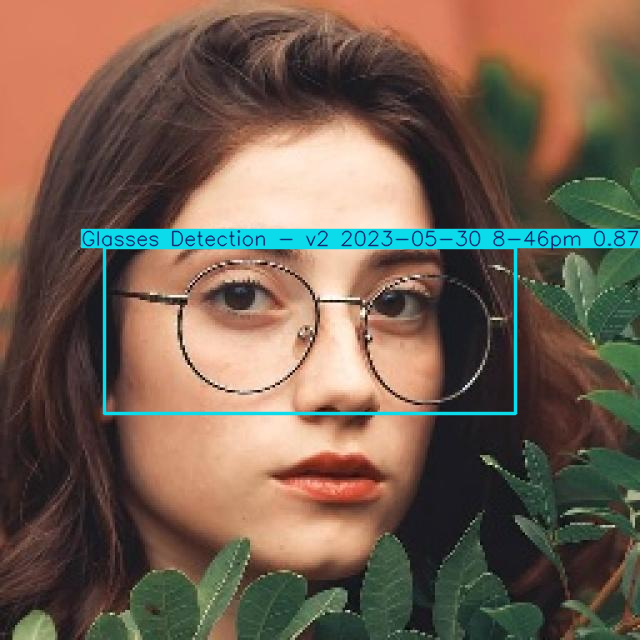

In [13]:
from ultralytics import YOLO
from IPython.display import Image, display

# Load model hasil training kamu
model = YOLO("runs/detect/detect_glasses/weights/best.pt")

# Jalankan deteksi pada gambar dataset
img_path = "/content/glasses-1/test/images/beautiful-beauty-branch-close-up-color-eyeglasses-eyewear-female-hair-hand_jpg.rf.f643bf9cd22f6e9f520b928af0c8f76e.jpg"
results = model(img_path, save=True)

# Tampilkan hasil deteksi langsung di notebook
results[0].show()


In [14]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Image 2026-01-30 at 18.36.18.jpeg to WhatsApp Image 2026-01-30 at 18.36.18.jpeg



image 1/1 /content/WhatsApp Image 2026-01-30 at 18.36.18.jpeg: 640x384 3 Glasses Detection - v2 2023-05-30 8-46pms, 215.8ms
Speed: 4.6ms preprocess, 215.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /content/runs/detect/predict3


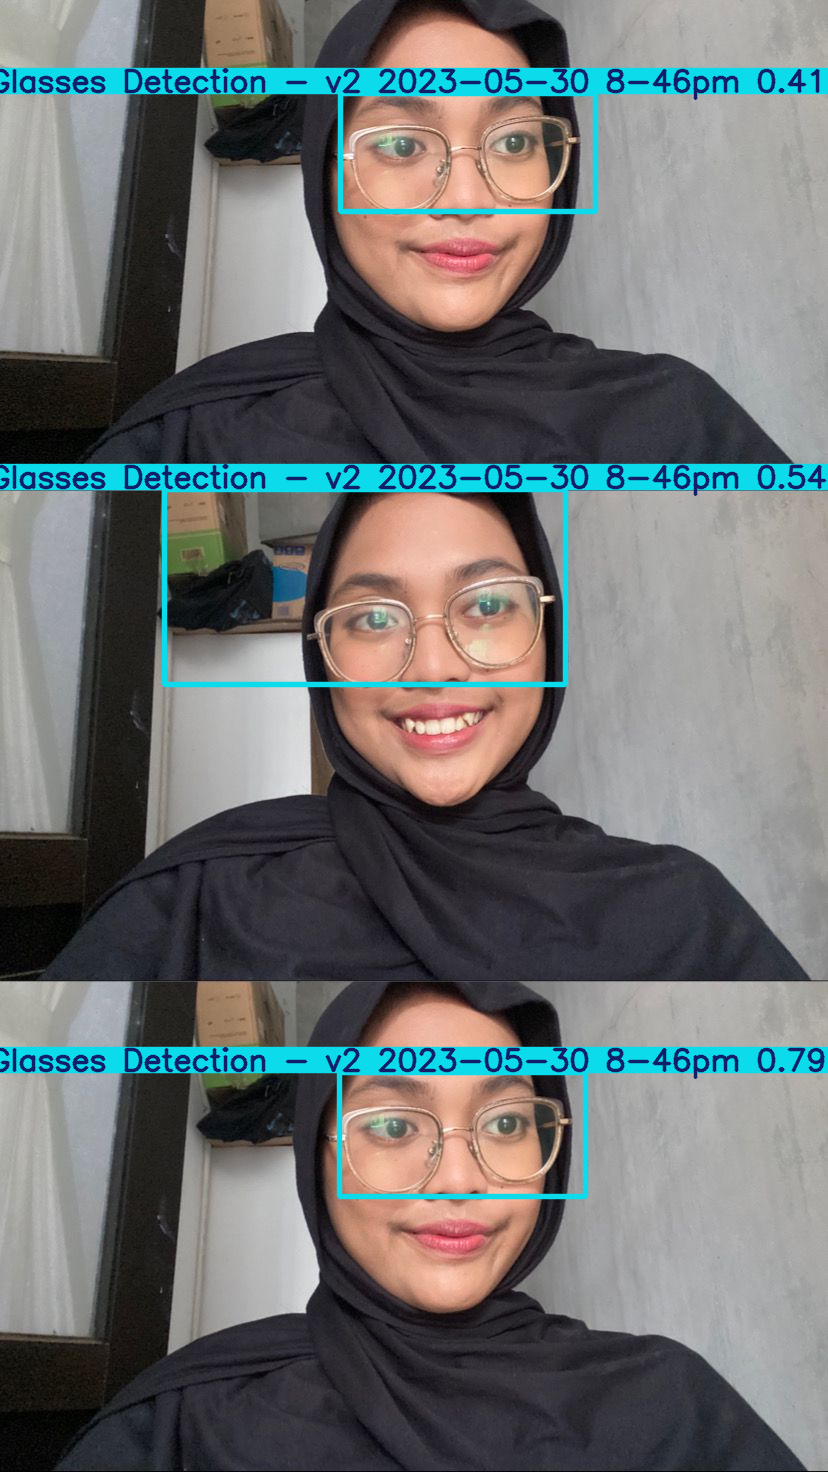

In [15]:
from ultralytics import YOLO
from IPython.display import Image, display

# Muat model hasil training
model = YOLO("runs/detect/detect_glasses/weights/best.pt")

# Nama file hasil upload
img_path = "WhatsApp Image 2026-01-30 at 18.36.18.jpeg"

# Jalankan deteksi dan simpan hasil
results = model(img_path, save=True)

# Tampilkan hasil di Colab
results[0].show()
